In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import Input

from tensorflow.keras.utils import to_categorical, plot_model

import numpy as np

In [2]:
text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

In [3]:
text_input = Input(shape=(None,), dtype='int32', name='text')
embedded_text = layers.Embedding(64, text_vocabulary_size)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)

In [4]:
question_input = Input(shape=(None,), dtype='int32', name='question')
embedded_question = layers.Embedding(32, question_vocabulary_size)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

In [5]:
# concatenate axis=-1 (?)
concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)
answer = layers.Dense(answer_vocabulary_size,
activation='softmax')(concatenated)
model = Model([text_input, question_input], answer)

In [6]:
x = np.arange(20).reshape(2, 2, 5)
y = np.arange(20, 30).reshape(2, 1, 5)
z = np.arange(20, 40).reshape(2, 2, 5)

print(f"x : {x.shape} \n{x}")
print(f"y : {y.shape} \n{y}")
print(f"z : {z.shape} \n{z}")

xy = layers.Concatenate(axis=1)([x, y])
print(f"xy (axis=1):")
print(xy)

xz = layers.Concatenate(axis=-1)([x, z])
print(f"xz (axis=-1):")
print(xz)

x : (2, 2, 5) 
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]]
y : (2, 1, 5) 
[[[20 21 22 23 24]]

 [[25 26 27 28 29]]]
z : (2, 2, 5) 
[[[20 21 22 23 24]
  [25 26 27 28 29]]

 [[30 31 32 33 34]
  [35 36 37 38 39]]]
xy (axis=1):
tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [20 21 22 23 24]]

 [[10 11 12 13 14]
  [15 16 17 18 19]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32)
xz (axis=-1):
tf.Tensor(
[[[ 0  1  2  3  4 20 21 22 23 24]
  [ 5  6  7  8  9 25 26 27 28 29]]

 [[10 11 12 13 14 30 31 32 33 34]
  [15 16 17 18 19 35 36 37 38 39]]], shape=(2, 2, 10), dtype=int32)


In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
question (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 10000)  640000      text[0][0]                       
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 10000)  320000      question[0][0]                   
______________________________________________________________________________________________

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

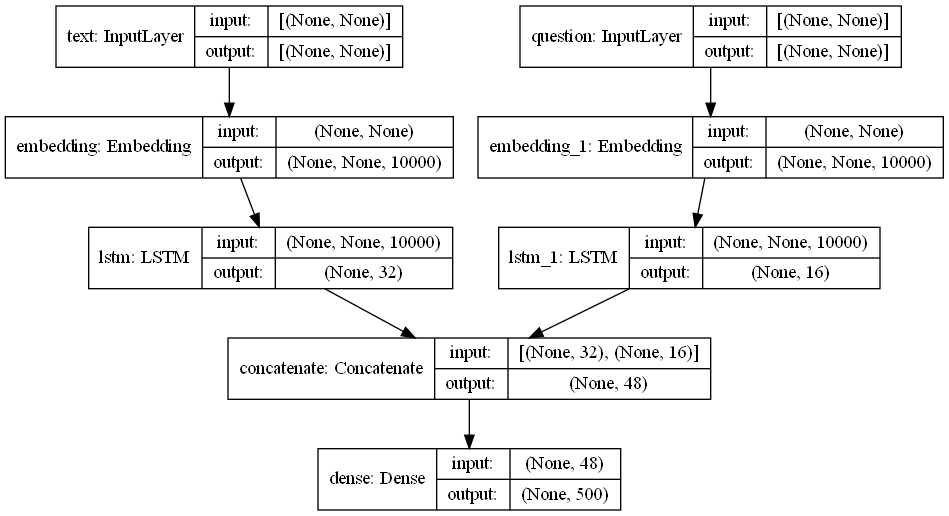

In [9]:
plot_model(model, to_file='multi_input_model.png', show_shapes=True)

In [10]:
# num_samples = 1000
# max_length = 100

In [11]:
# text = np.random.randint(1, text_vocabulary_size, size=(num_samples, max_length))
# question = np.random.randint(1, question_vocabulary_size, size=(num_samples, max_length))
# answers = np.random.randint(0, answer_vocabulary_size, size=num_samples)
# print(f"text.shape: {text.shape}")
# print(f"question.shape: {question.shape}")
# print(f"answers.shape: {answers.shape}")

# answers = to_categorical(answers)
# print(f"answers.shape: {answers.shape}")

In [12]:
# model.fit([text, question], answers, epochs=10, batch_size=128)
# model.fit({'text': text, 'question': question}, answers, epochs=10, batch_size=128)